In [1]:
# Loading the required packages and libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Loading the data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# 2. Exploring the data 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Here we check the percentage of nan values present in each feature.
features_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [7]:
features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
for features in features_na:
    print(features,np.round(df[features].isnull().mean(),4),'%')

LotFrontage 0.1774 %
Alley 0.9377 %
MasVnrType 0.0055 %
MasVnrArea 0.0055 %
BsmtQual 0.0253 %
BsmtCond 0.0253 %
BsmtExposure 0.026 %
BsmtFinType1 0.0253 %
BsmtFinType2 0.026 %
FireplaceQu 0.4726 %
GarageType 0.0555 %
GarageYrBlt 0.0555 %
GarageFinish 0.0555 %
GarageQual 0.0555 %
GarageCond 0.0555 %
PoolQC 0.9952 %
Fence 0.8075 %
MiscFeature 0.963 %


In [9]:
#We might want to remove columns with more than 50% missing values
more_than_50_percent_misssing_value_features = [features for features in features_na if (np.round(df[features].isnull().mean(),4)) > 0.5]

In [10]:
more_than_50_percent_misssing_value_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

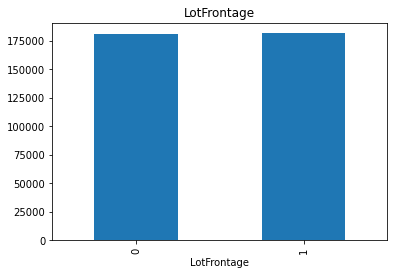

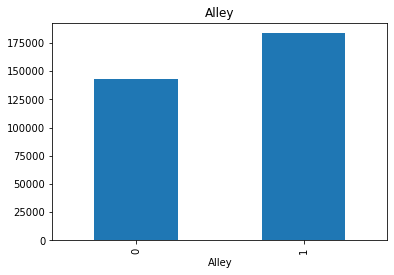

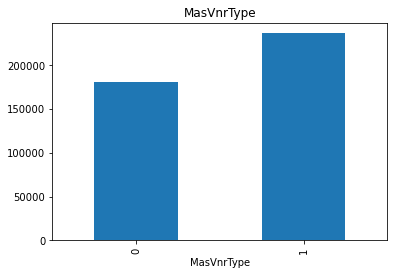

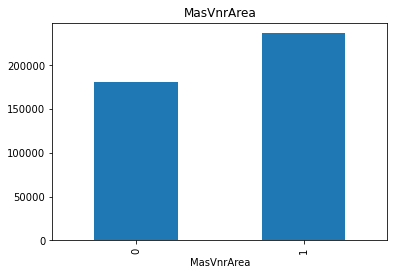

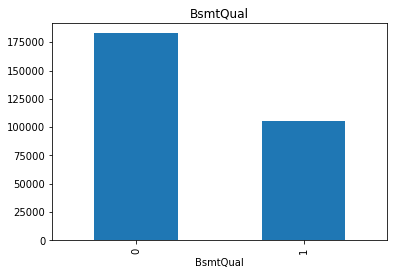

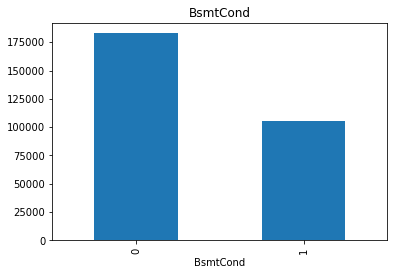

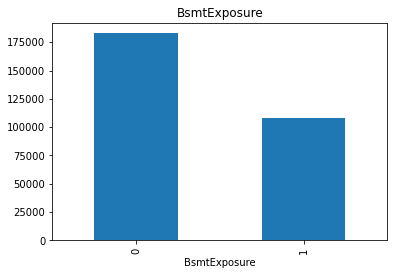

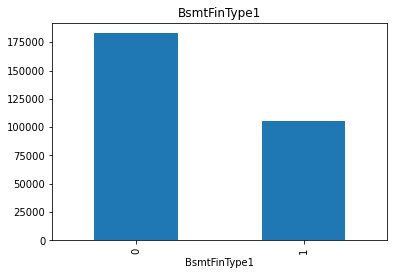

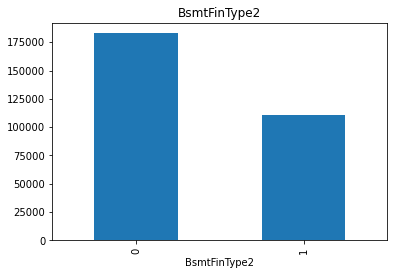

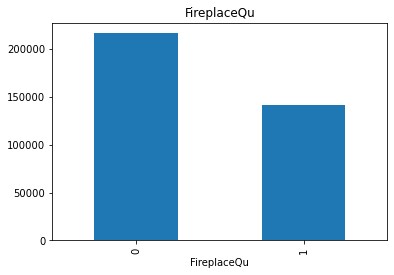

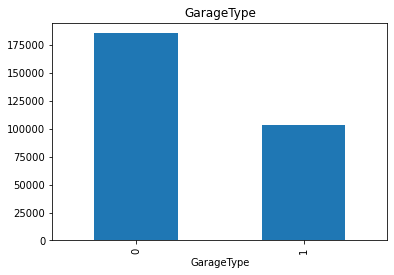

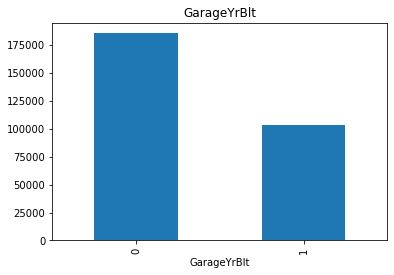

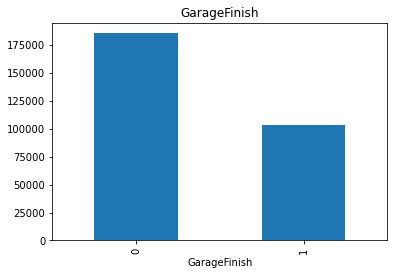

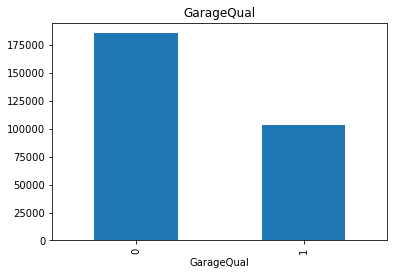

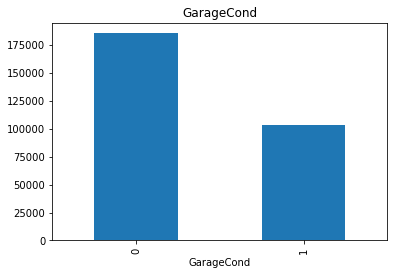

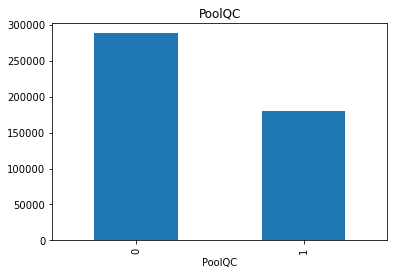

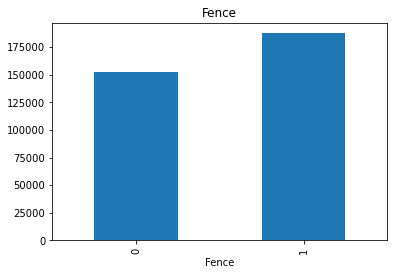

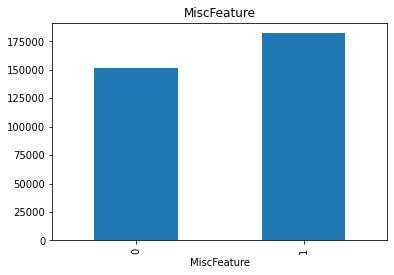

In [11]:
for feature in feautres_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [12]:
#We observe that the data with the missing values and the dependent variable(Sales Price) is clearly visible.So We need to replace these missing values with meaningful data.
#Now we see the which features are having numerical data.
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
#So we see that there are 38 features which are numerical.
#Also we see that, some columns are having year.So we try to find out the fields which contain year information.As these will be used to calculate the age of house.
year_features = [features for features in numerical_features if "Yr" in features or "Year" in features]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

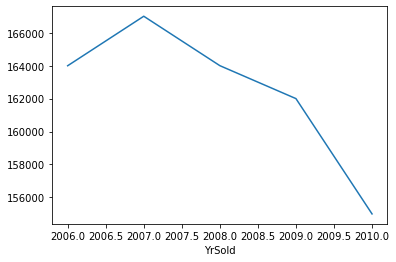

In [15]:
#Observing the SalesPrice as per the year sold
df.groupby('YrSold')['SalePrice'].median().plot()

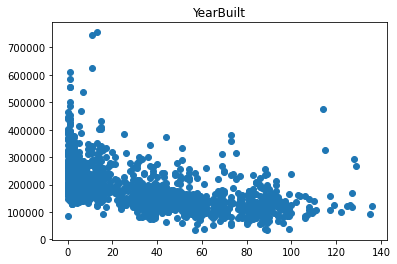

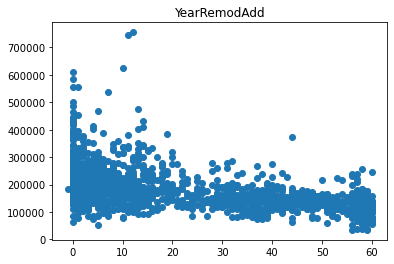

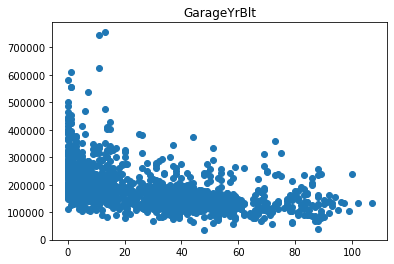

In [16]:
#We observe that the price is decresing as the years are more recent, which is very strange, so we look further
for feature in year_features:
    if feature != "YrSold":
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

In [17]:
#For each case we see that the house price is more for the house which is recently built and sold, 
#which is reasonable

#Going on further, for numerical variables we observe that it can be of 2 types. Discrete and continous. 
#If we take a limit of 25 distinct values as discreate variables, let us try to find the discrete variables.
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [18]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


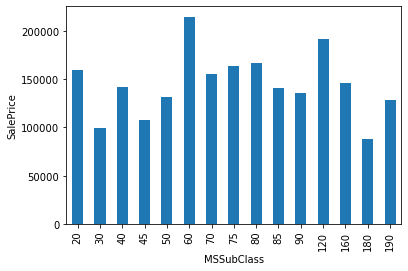

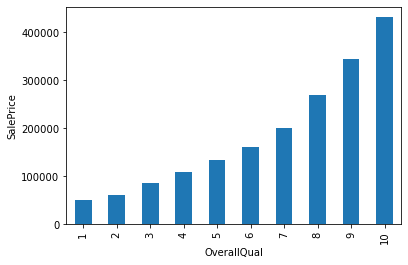

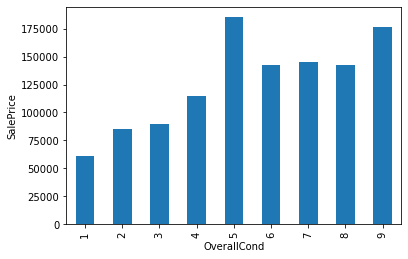

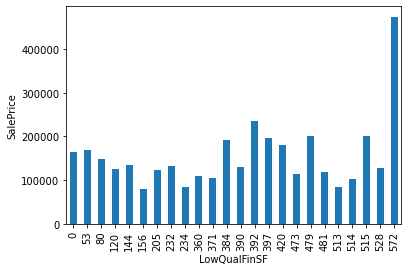

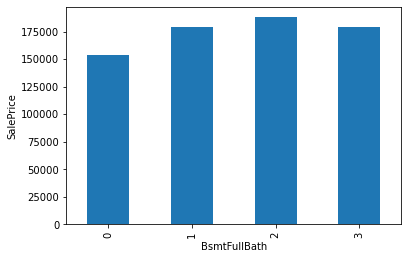

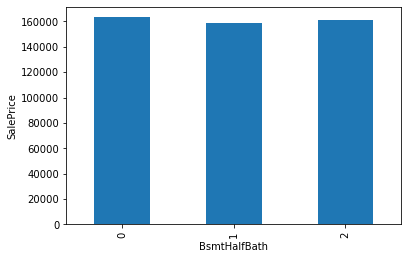

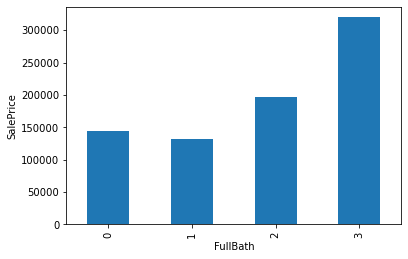

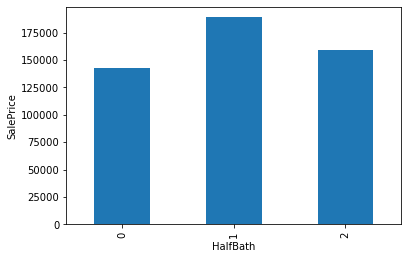

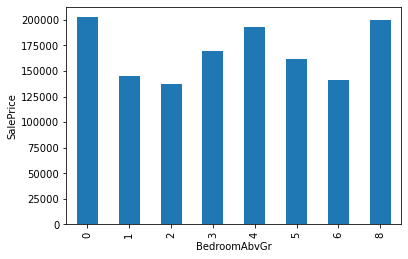

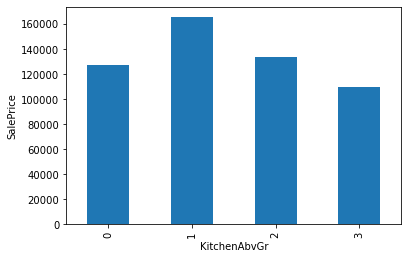

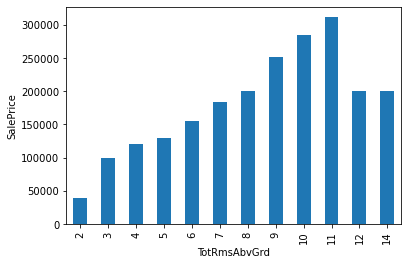

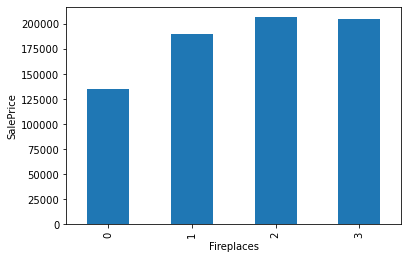

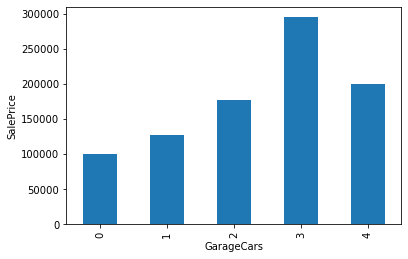

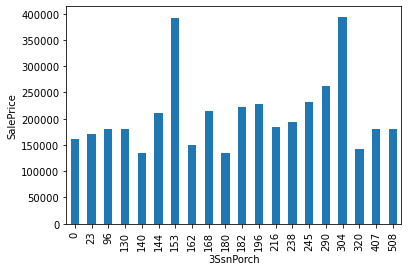

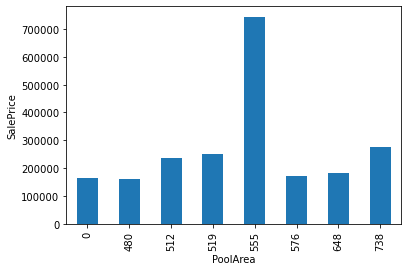

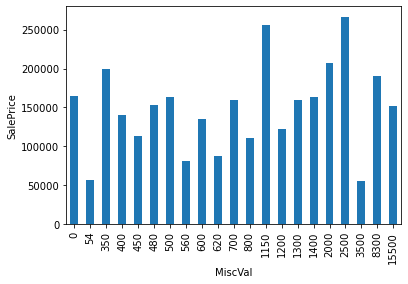

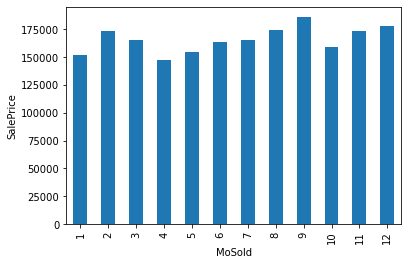

In [19]:
#We see that ther are 17 discrete variables

#We try to explore its relation with SalePrice
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [20]:
#We observe that there is some relationship between these discrete variables and SalePrice

#Now we see the continous numerical features
continous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

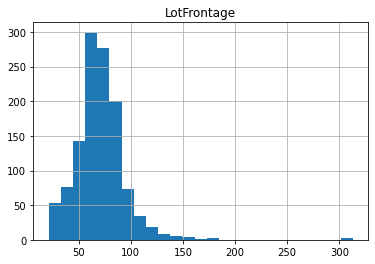

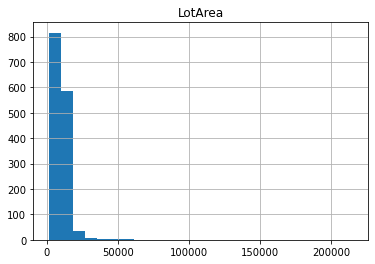

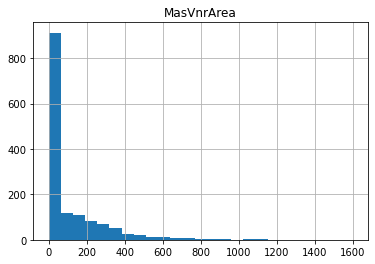

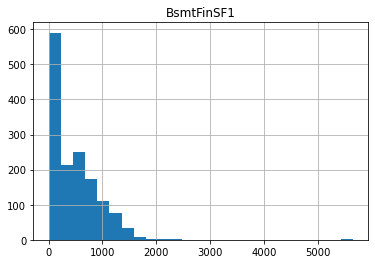

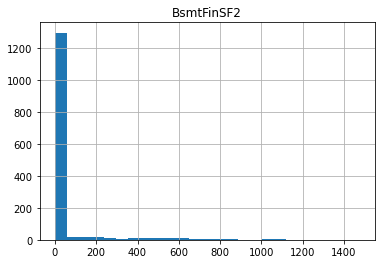

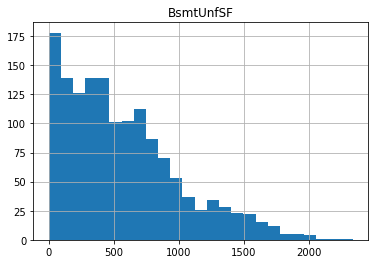

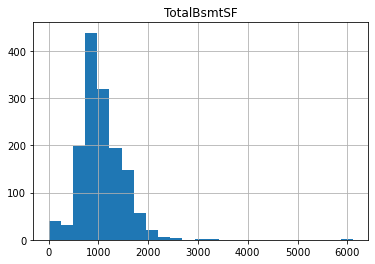

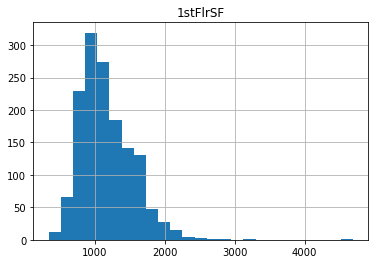

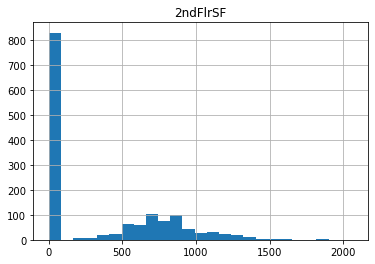

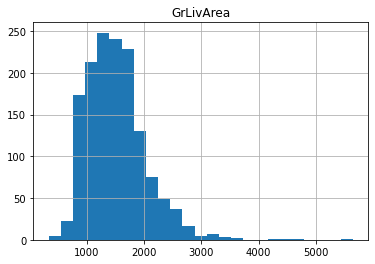

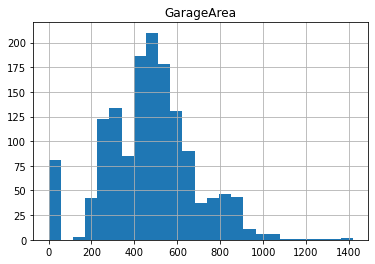

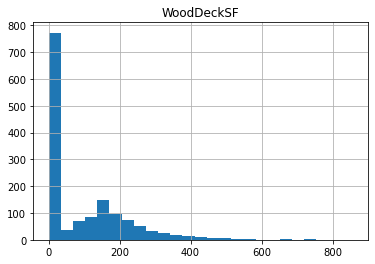

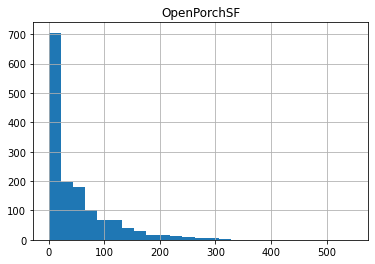

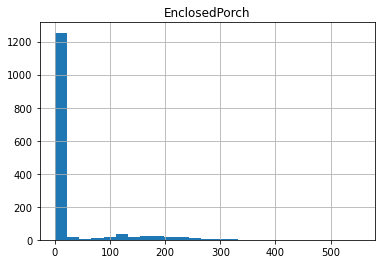

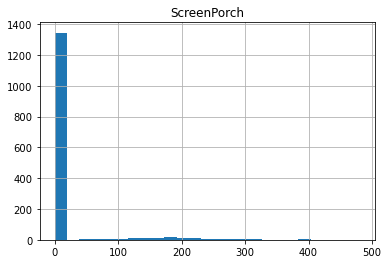

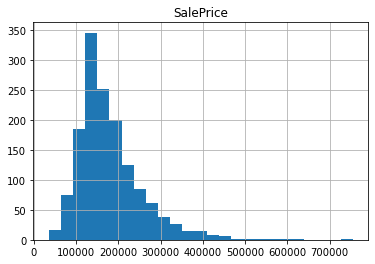

In [21]:
#Using histograms for continous numerical variable to study the pattern
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()
    

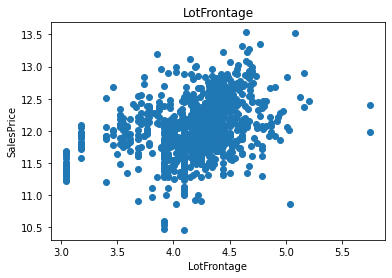

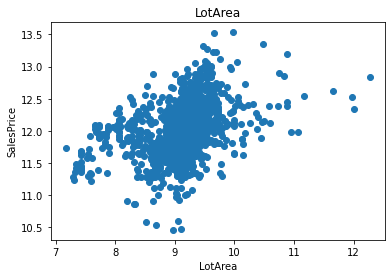

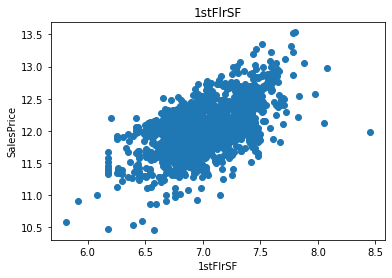

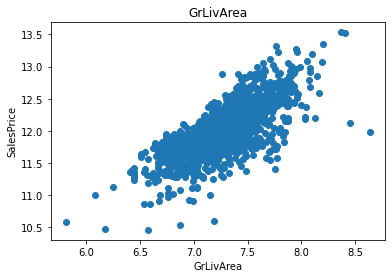

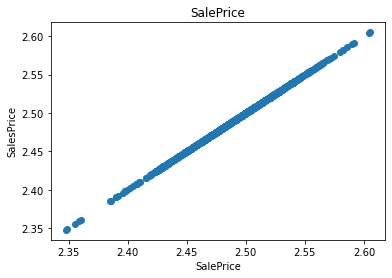

In [22]:
#We observe that some of the distributions are gaussian, but others are skewed

#We try to normalise the skewed ones with lograthmic transformation
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

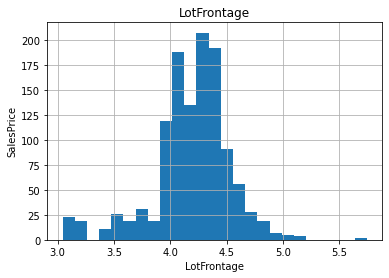

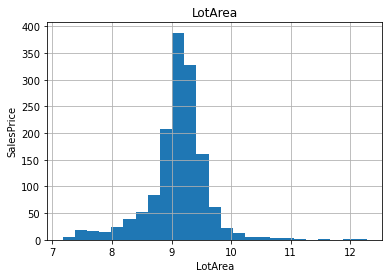

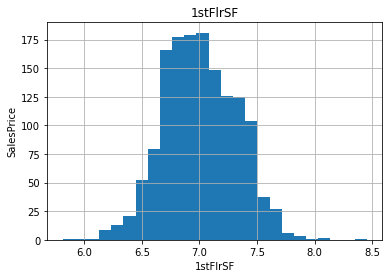

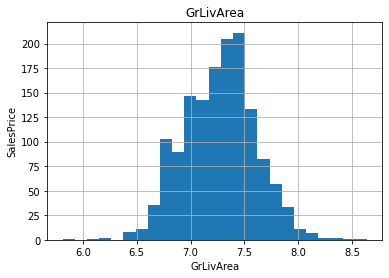

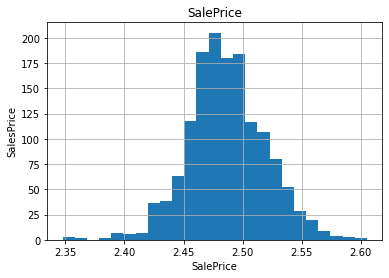

In [23]:
#We see that there is a positive correlation betweent he features and the SalePrice

for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        data[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

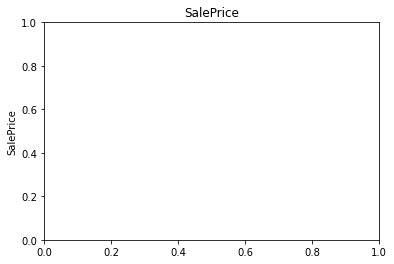

In [24]:
#Now we search for outliers
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #data.boxplot(column=feature)
        plt.ylabel(feature)
        #plt.ylabel('SalesPrice')
        plt.title(feature)

In [25]:
#Now we go for categorical features
categorical_features =[feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(df[feature].unique())))

Distinct categories for MSZoning  are 5
Distinct categories for Street  are 2
Distinct categories for Alley  are 3
Distinct categories for LotShape  are 4
Distinct categories for LandContour  are 4
Distinct categories for Utilities  are 2
Distinct categories for LotConfig  are 5
Distinct categories for LandSlope  are 3
Distinct categories for Neighborhood  are 25
Distinct categories for Condition1  are 9
Distinct categories for Condition2  are 8
Distinct categories for BldgType  are 5
Distinct categories for HouseStyle  are 8
Distinct categories for RoofStyle  are 6
Distinct categories for RoofMatl  are 8
Distinct categories for Exterior1st  are 15
Distinct categories for Exterior2nd  are 16
Distinct categories for MasVnrType  are 5
Distinct categories for ExterQual  are 4
Distinct categories for ExterCond  are 5
Distinct categories for Foundation  are 6
Distinct categories for BsmtQual  are 5
Distinct categories for BsmtCond  are 5
Distinct categories for BsmtExposure  are 5
Distinct 

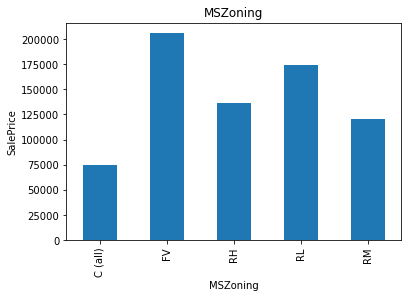

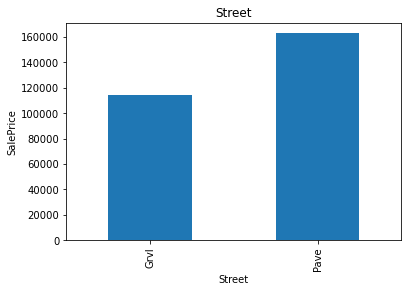

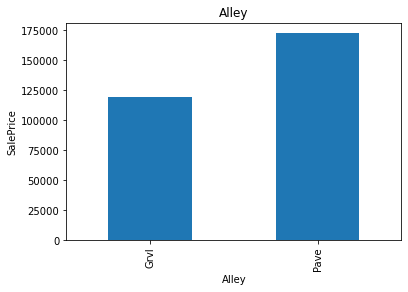

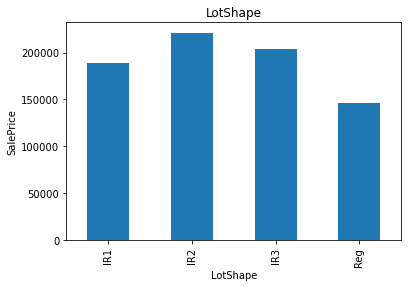

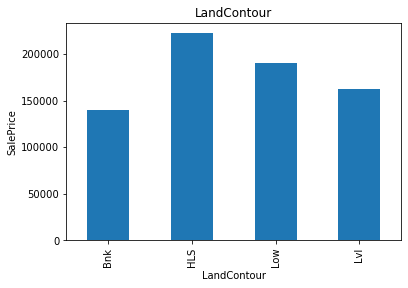

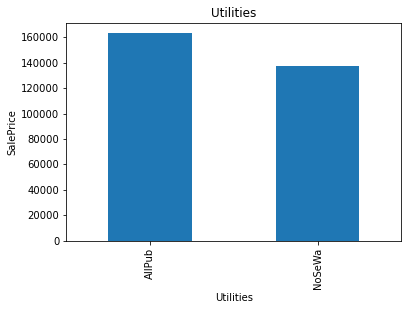

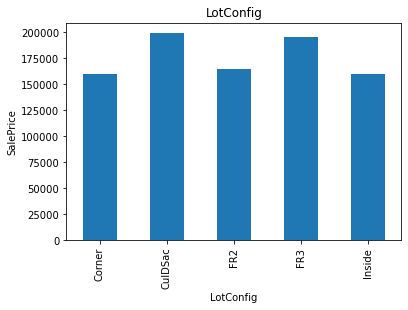

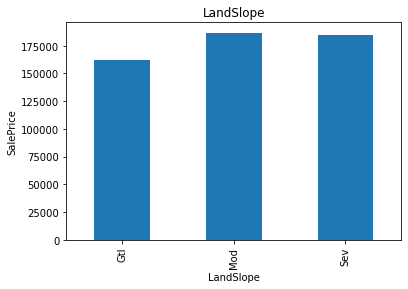

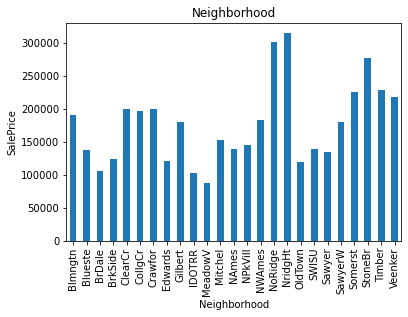

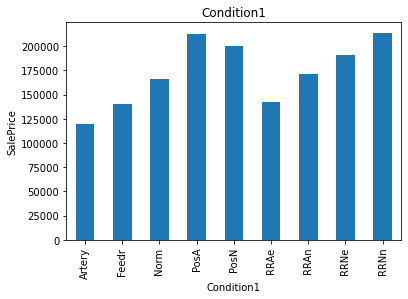

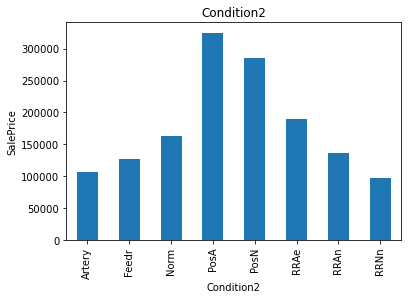

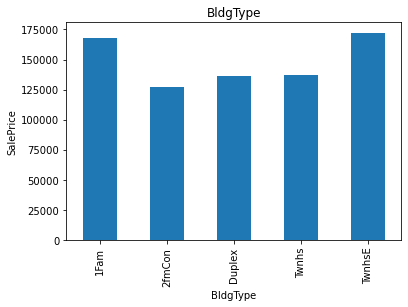

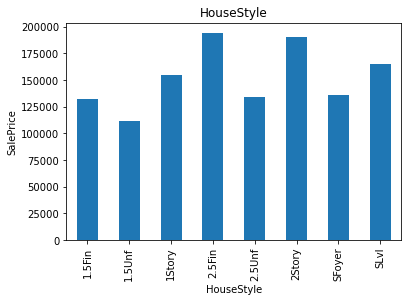

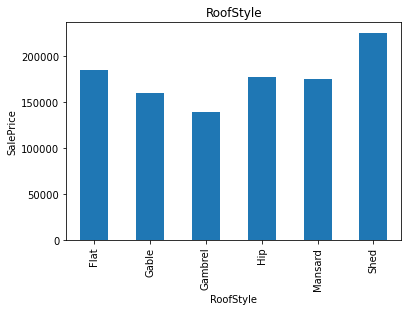

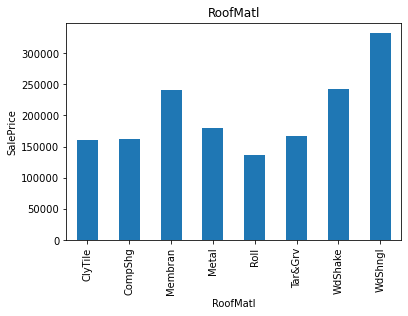

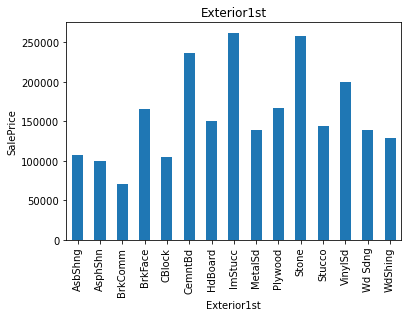

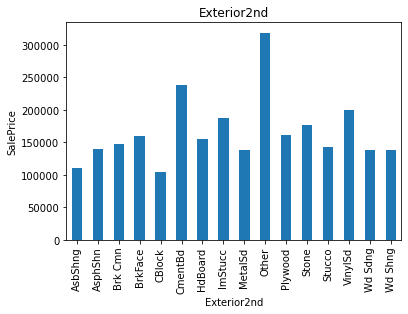

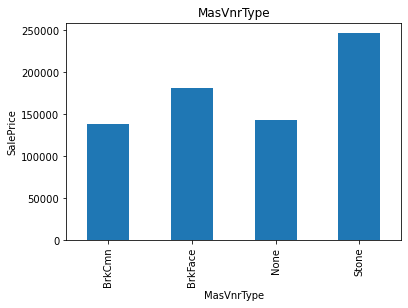

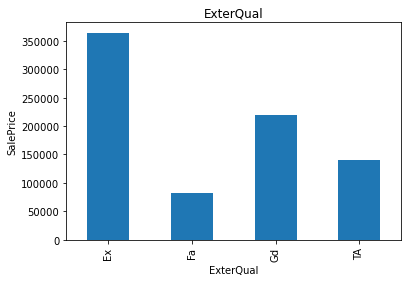

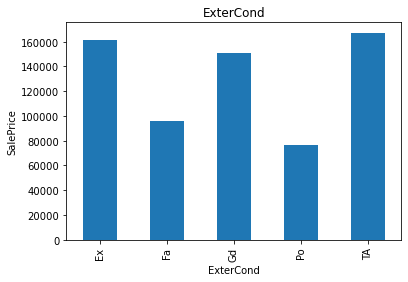

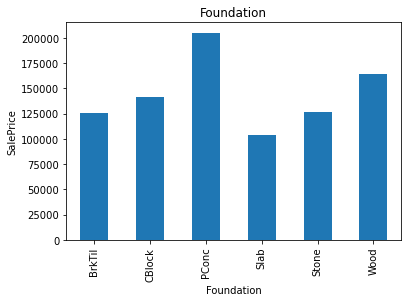

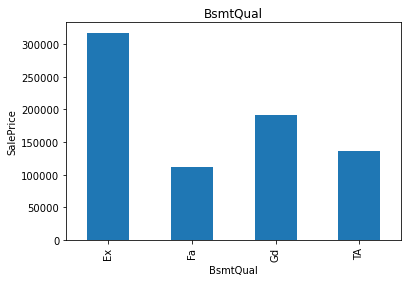

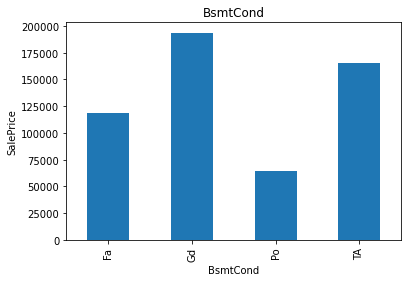

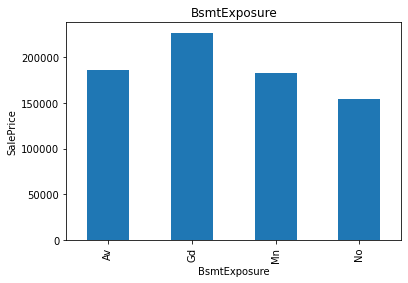

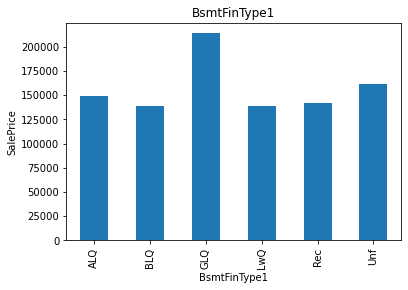

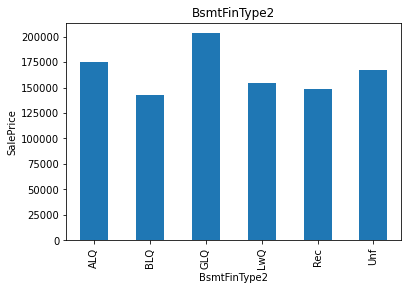

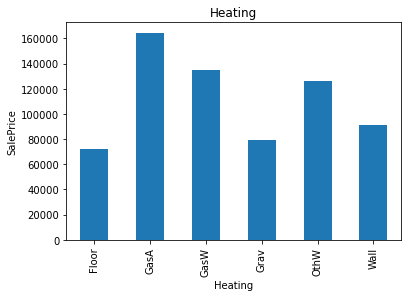

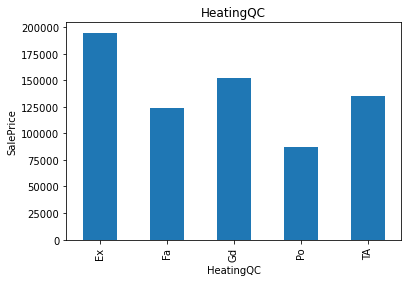

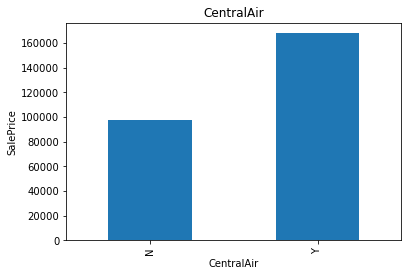

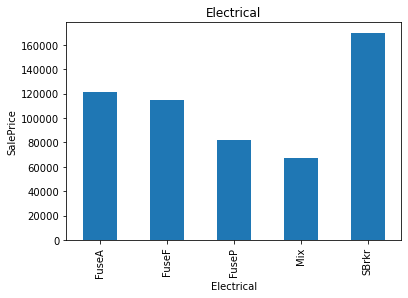

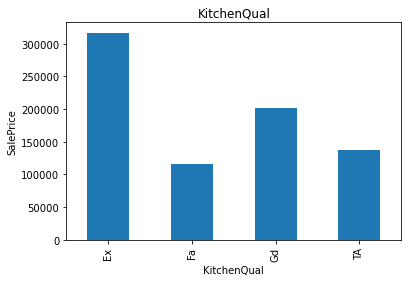

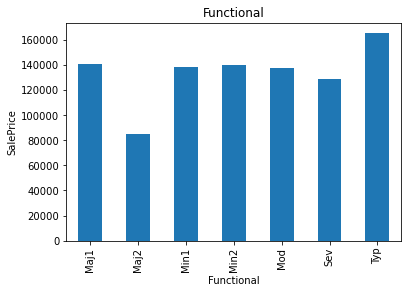

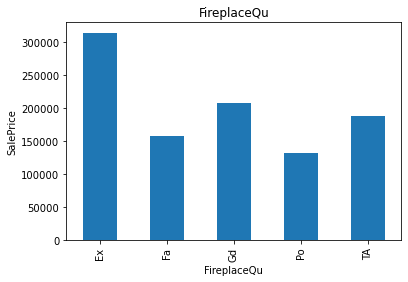

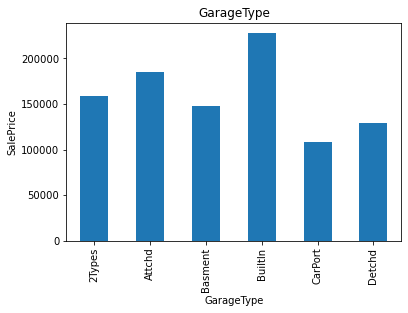

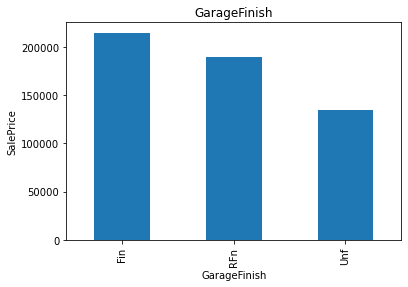

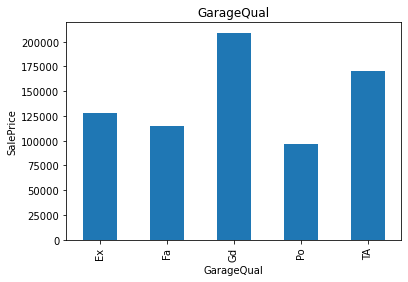

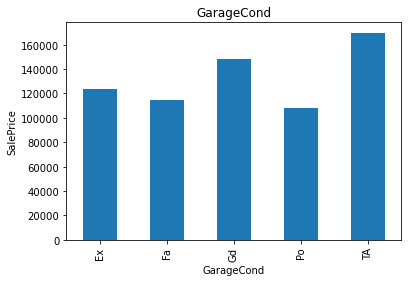

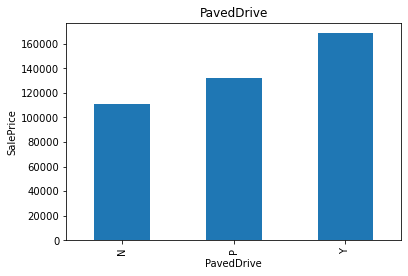

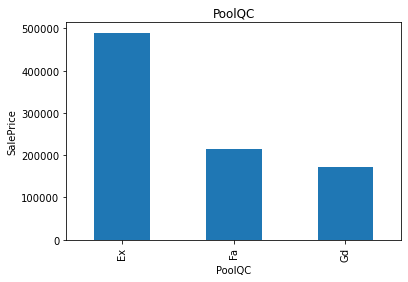

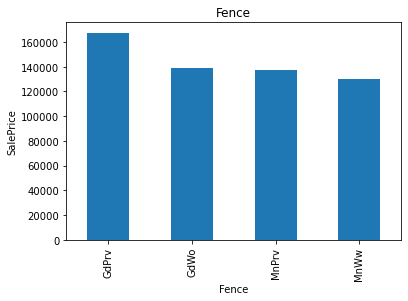

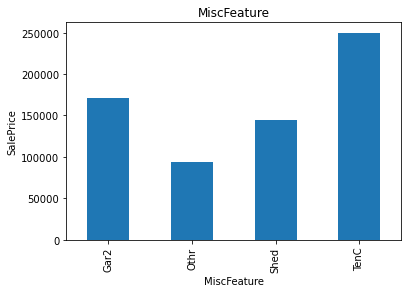

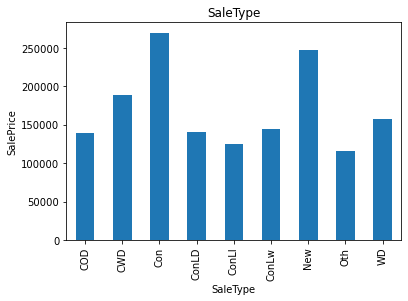

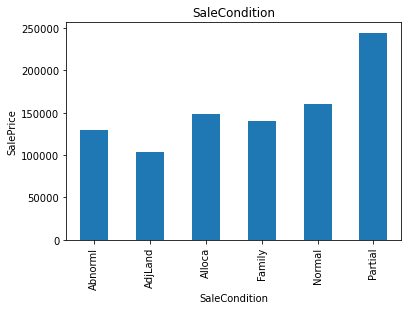

In [27]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [28]:
df_test.shape

(1459, 80)

In [29]:
df.shape

(1460, 81)

In [105]:
#We see that there are 79 features

In [30]:
# Checking the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

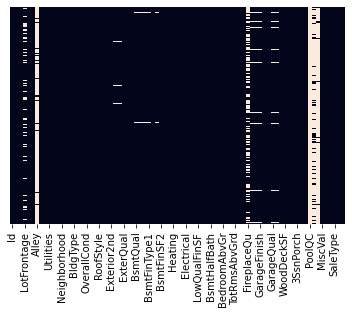

In [31]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [107]:
#3. Data cleaning
#3.1 Missing value handling
#Filling the missing value we need to see the test and train data simultaneously.
#We will be replacing the null values with mode for categorical values, discrete numerical values and year variables
#We will be replacing the null values with mean for continous numerical values.
#We will delete columns with more than 50% null values as the available information add no value for our model.

<AxesSubplot:>

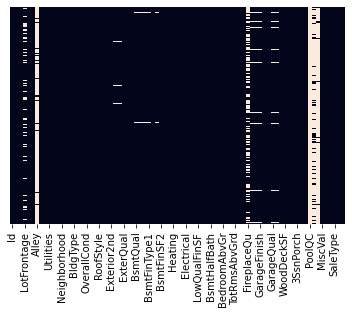

In [33]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [34]:
for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test    

In [35]:
for feature in discrete_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test  

In [36]:
for feature in year_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test  

In [37]:
# as sales price is absent in test data so we want to remove it from the feature list
continous_numerical_features = [feature for feature in continous_features if feature not in 'SalePrice']

In [38]:
for feature in continous_numerical_features:
    df[feature] = df[feature].fillna(df[feature].mean())                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mean())  #test  

In [39]:
for feature in more_than_50_percent_misssing_value_features:
    df.drop([feature],axis = 1, inplace = True)
    df_test.drop([feature],axis = 1, inplace = True)

In [40]:
#We will also drop the id column as it is not useful for prediction
df.drop(['Id'],axis = 1, inplace = True)
df_test.drop(['Id'],axis = 1, inplace = True)

<AxesSubplot:>

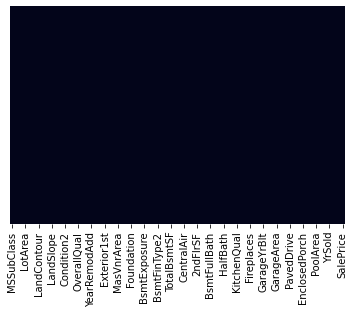

In [41]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [42]:
df.shape

(1460, 76)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [44]:
df.shape

(1460, 76)

In [45]:
df.dropna(inplace=True)

In [46]:
df.shape

(1460, 76)

In [47]:
df_test.shape

(1459, 75)

In [108]:
#4. Feature Engineering
#4.1 Handling rare categorical features

#There may be some features that are less than 1% in the feature, we can remove them as they are not adding 
#any value to the relationship between the feature and the SalePrice

In [48]:
# replacing rare variables with "Rare_v" for train 
'''
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count() / len(df)
    temp_df = temp[temp > 0.01].index
    df[feature] = np.where (df[feature].isin(temp_df), df[feature],'Rare_var') # for test
    df_test[feature] = np.where (df_test[feature].isin(temp_df), df_test[feature],'Rare_var') # for test
'''   

"\nfor feature in categorical_features:\n    temp = df.groupby(feature)['SalePrice'].count() / len(df)\n    temp_df = temp[temp > 0.01].index\n    df[feature] = np.where (df[feature].isin(temp_df), df[feature],'Rare_var') # for test\n    df_test[feature] = np.where (df_test[feature].isin(temp_df), df_test[feature],'Rare_var') # for test\n"

In [109]:
#4.2 Data Transformation by one Hot Encoding of categorical variables

In [49]:
columns =[feature for feature in df.columns if df[feature].dtypes == 'O']
len(columns)

39

In [50]:
# Converting categorical variables to one hot encoding
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [51]:
# making a copy of dataframe for future use
main_df=df.copy()

In [52]:
# concanating the test and train files to implement one hot encoding
final_df=pd.concat([df,df_test],axis=0)

In [53]:
final_df.shape

(2919, 76)

In [54]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [55]:
final_df.shape

(2919, 237)

In [56]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [57]:
final_df.shape

(2919, 177)

In [58]:
# separating the test and training data
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [59]:
df_Train.shape

(1460, 177)

In [60]:
df_Test.shape

(1459, 177)

In [61]:
# dropping the "SalePrice" column from test data
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/Users/ashishchittimilla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
# preparing data for feeding into model
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [63]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
X_train['GarageYrBlt'] = pd.to_numeric(X_train['GarageYrBlt'])

In [65]:
X_train['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [110]:
#5. Base Model implementation and evaluating it's RMSE

In [66]:
# implementing XGBoost regressor
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
import pickle
filename = "finalazied_model.plk"
pickle.dump(classifier,open(filename,'wb'))

In [68]:
#df_Test['GarageYrBlt'] = pd.to_numeric(df_Test['GarageYrBlt'])

In [69]:
df_Test['GarageYrBlt'][1]

1958.0

In [70]:
# predicting the house prices
y_predict = classifier.predict(df_Test)

In [71]:
# displaying the house price
y_predict

array([120080.97, 154969.73, 196290.12, ..., 159433.02, 103948.95,
       237876.27], dtype=float32)

In [72]:
##Creating Sample Submission file
pred=pd.DataFrame(y_predict)
sub_df=pd.read_csv('sample_submission.csv')
#datasets=pd.concat([sub_df['Id'],pred],axis=1)
sub_df['SalePrice'] = pred
#datasets.columns=['Id','SalePrice']
sub_df.to_csv('sub2.csv',index=False)

In [73]:
sub_df

,Id,SalePrice
0,1461,120080.968750
1,1462,154969.734375
2,1463,196290.125000
3,1464,184650.250000
4,1465,191611.484375
...,...,...
1454,2915,80048.109375
1455,2916,83881.617188
1456,2917,159433.015625
1457,2918,103948.953125


In [112]:
#Base Mode Results
#Got an RMSE score of 0.14106 on kaggle leaderboard 

In [111]:
#6. Hyper parameter tuning

In [74]:
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [75]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [76]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[12:03:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-16342.509, test=-21516.891) total time=   3.5s
[CV 1/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2253.044, test=-15102.352) total time=   8.7s
[CV 5/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4

/Users/ashishchittimilla/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[12:03:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-16977.298, test=-19357.599) total time=   3.5s
[CV 2/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2118.727, test=-15876.331) total time=   8.8s
[12:03:39] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Par

[12:03:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-16155.063, test=-21465.047) total time=   3.5s
[CV 3/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2056.674, test=-16382.658) total time=   8.8s
[12:03:39] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Par

[12:03:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-17325.537, test=-17941.417) total time=   3.5s
[12:03:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistake

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param

In [77]:
# finding the best estimate
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
# Using the above results we tune our regerssor for better performance

In [83]:
# substituting the best parameters
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
y_predict1 = regressor.predict(df_Test)

In [86]:
y_predict1

array([119051.  , 162035.94, 186323.8 , ..., 176710.2 , 117796.74,
       235172.62], dtype=float32)

In [87]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_predict1)
sub_df=pd.read_csv('sample_submission.csv')
#datasets=pd.concat([sub_df['Id'],pred],axis=1)
#datasets.columns=['Id','SalePrice']
#datasets.to_csv('housepricetuned.csv',index=False)
sub_df['SalePrice'] = pred
#datasets.columns=['Id','SalePrice']
sub_df.to_csv('sub3.csv',index=False)

In [113]:
#Got an RMSE score of 0.13386 on kaggle leaderboard

#Result
#We got a slight improvement with hyperparameter tuning (from 0.14106 to 0.13386). Needs more tuning!

#7. Attempt to improve the score
#We can use the result to again train our XGBoost model as follows:

#  1. We will concatenate the resultant SalePrice with the test data.
#  2. We will combine the test and train data to train our model



In [88]:
pred

,0
0,119051.000000
1,162035.937500
2,186323.796875
3,196444.843750
4,194105.156250
...,...
1454,82816.484375
1455,70365.187500
1456,176710.203125
1457,117796.742188


In [89]:
pred.columns = ['SalePrice']

In [90]:
pred

,SalePrice
0,119051.000000
1,162035.937500
2,186323.796875
3,196444.843750
4,194105.156250
...,...
1454,82816.484375
1455,70365.187500
1456,176710.203125
1457,117796.742188


In [91]:
df_Train.shape

(1460, 177)

In [92]:
df_Test.shape

(1459, 176)

In [93]:
test_new = pd.concat([df_Test,pred],axis = 1)
test_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,1,0,119051.000000
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,1,0,162035.937500
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,1,0,186323.796875
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,1,0,196444.843750
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,1,0,194105.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,82816.484375
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,0,0,0,0,0,70365.187500
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,0,0,0,0,0,176710.203125
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,1,0,117796.742188


In [94]:
train_new = pd.concat([df_Train,test_new],axis =0)
train_new.shape 

(2919, 177)

In [95]:
X_train=train_new.drop(['SalePrice'],axis=1)
y_train=train_new['SalePrice']

In [96]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[13:19:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-14730.080, test=-14284.886) total time=   4.4s
[13:19:42] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some paramet

/Users/ashishchittimilla/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[13:19:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-13838.111, test=-17491.310) total time=   4.5s
[CV 2/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2679.137, test=-12985.373) total time=  12.4s
[13:19:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Par

[13:19:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-13609.009, test=-17759.228) total time=   4.4s
[CV 1/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2655.358, test=-13715.259) total time=  12.4s
[13:19:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Par

[13:19:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-13399.641, test=-16277.260) total time=   4.5s
[CV 3/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2930.372, test=-11192.841) total time=  12.3s
[CV 5/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-3378.028, test=-5147.763) 

[13:29:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, max_depth=2, min_child_weight=2, n_estimators=100;, score=(train=-14950.943, test=-18531.256) total time=   0.5s
[13:29:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistaken

[13:31:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=500;, score=(train=-14287.140, test=-18071.863) total time=   2.0s
[13:31:39] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistake

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param

[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=2, n_estimators=1500;, score=(train=-10.177, test=-12716.052) total time= 2.3min
[CV 3/5] END base_score=0.75, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=500;, score=(train=-6036.465, test=-10224.336) total time=   4.8s
[13:31:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100;, score=(train=-16133.838, test=-1971

[CV 4/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=1500;, score=(train=-8.504, test=-8760.045) total time= 2.1min
[13:36:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-13614.244, test=-17647.499) total time=   4.0s
[13:36:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Para

In [97]:
# finding the best estimate
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
# substituting the best parameters
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [103]:
y_predict2 = regressor.predict(df_Test)

In [104]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_predict2)
sub_df=pd.read_csv('sample_submission.csv')
sub_df['SalePrice'] = pred
sub_df.to_csv('sub4.csv',index=False)

[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=1500;, score=(train=-8.798, test=-8643.142) total time= 2.2min
[13:36:10] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=1500;, score=(train=-14755.059, test=-14386.224) total time=   5.4s
[CV 3/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1100;, score=(train=-434.186, test=-11375.75

In [114]:
#Scored an RMSE of 0.13219 !!! Improved